# Day033 : 機器如何學習?
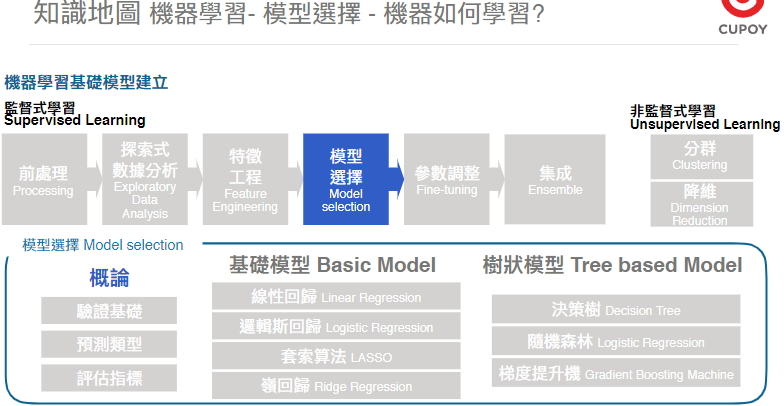

## [知識點目標]
1. 了解機器學習的原理
2. 機器學習的模型是如何被訓練出來的?
3. 過擬合(Overfitting)是甚麼，該如何解決?

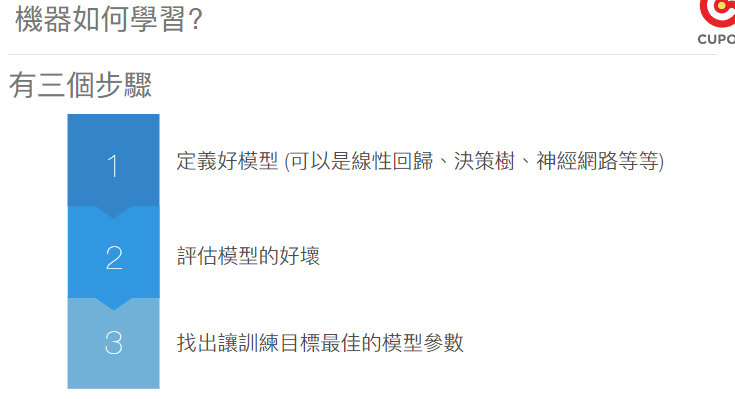

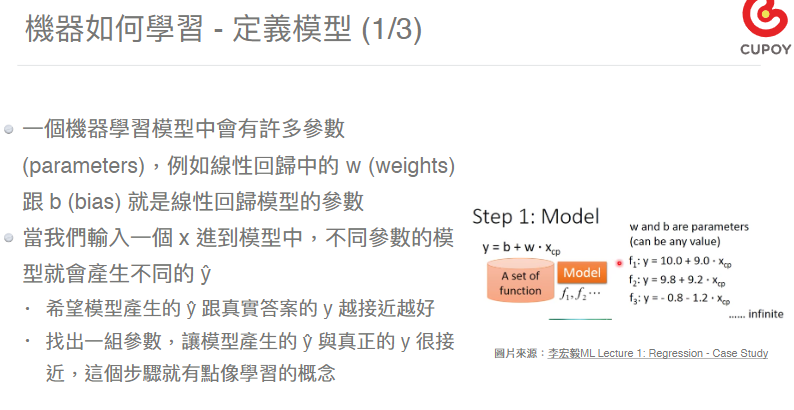

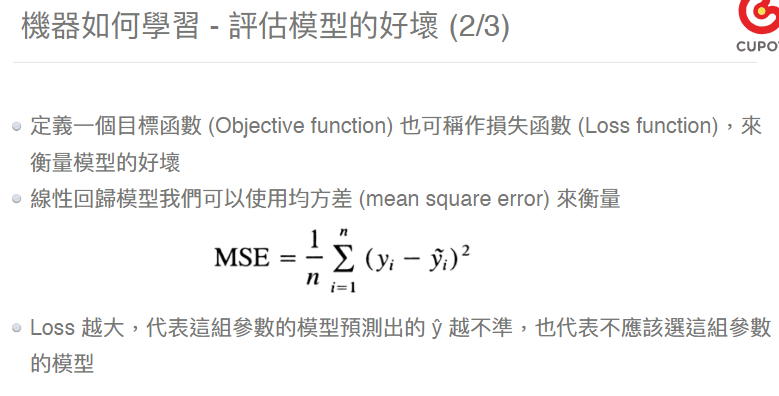

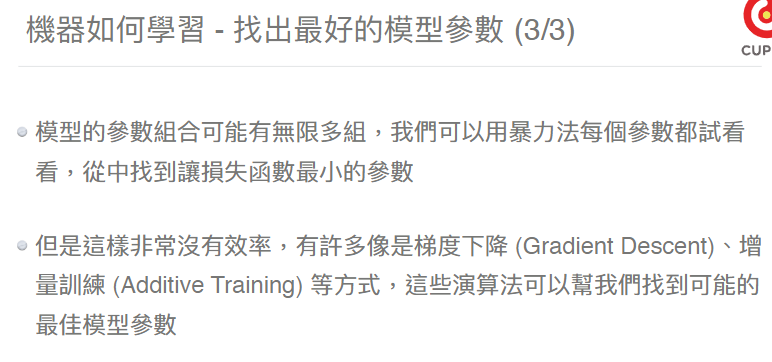

過擬合(Overfitting)

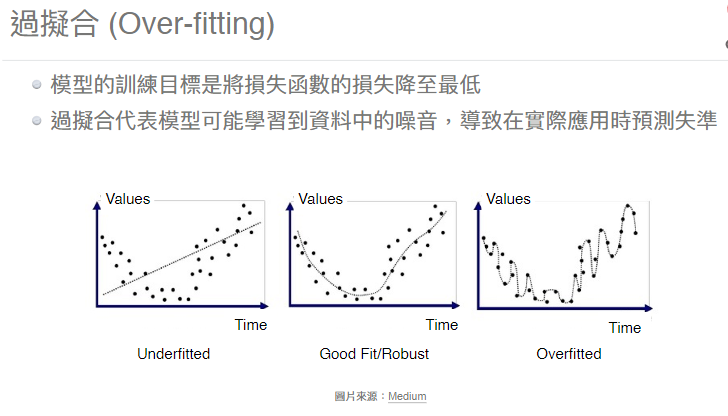

學習曲線 Learning curve

[參考網址](https://alliance.seas.upenn.edu/~cis520/dynamic/2017/wiki/index.php?n=Lectures.Overfitting)
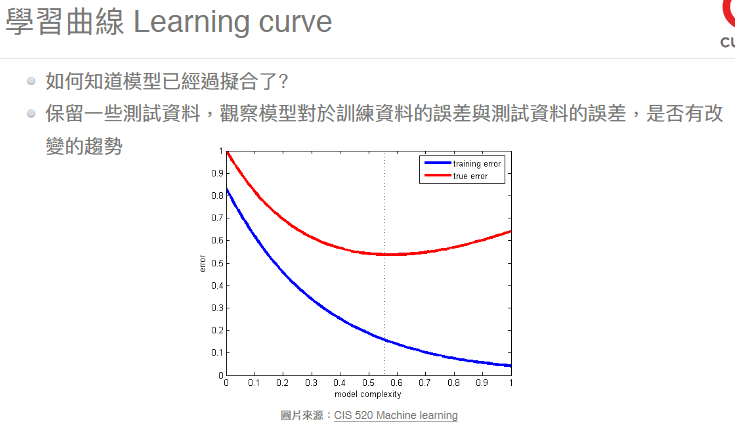

如何解決過擬合或欠擬合
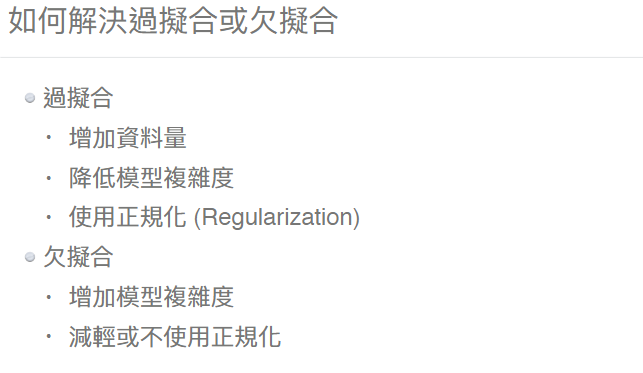

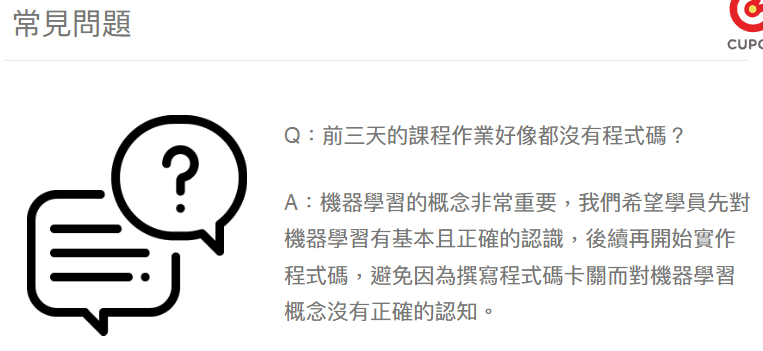

## [延伸閱讀]

[利用學習曲線診斷模型的偏差和方差](http://bangqu.com/yjB839.html)

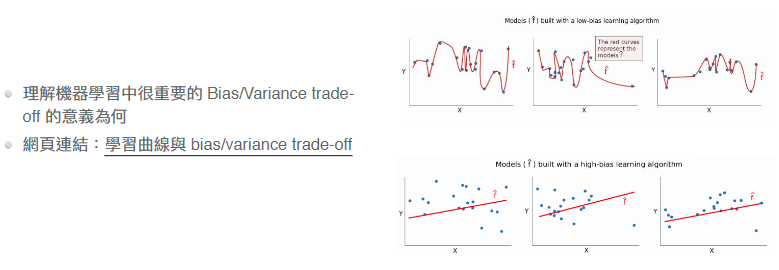

## [作業]

請觀看李宏毅教授以神奇寶貝進化 CP 值預測的範例，解說何謂機器學習與過擬合。並回答以下問題

https://www.youtube.com/watch?v=fegAeph9UaA

1. 模型的泛化能力 (generalization) 是指什麼？
2. 分類問題與回歸問題分別可用的目標函數有哪些？

# Day034 : 訓練/測試集切分的概念
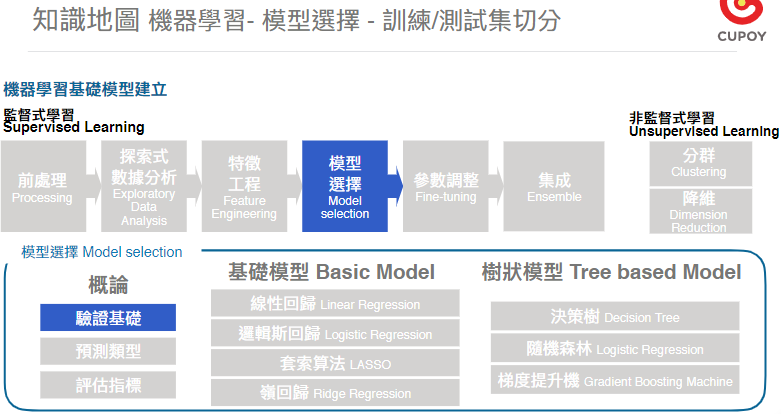

## [知識點目標]
1. 了解機器學習中資料的切分
2. 為何要進行訓練/測試集
3. 不同的切分方法以及意義

為何需要切分訓練/測試集
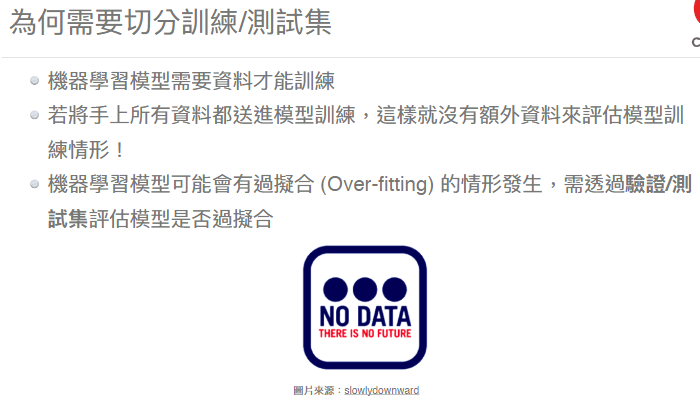

使用 Python Scikit-learn 進行資料切分
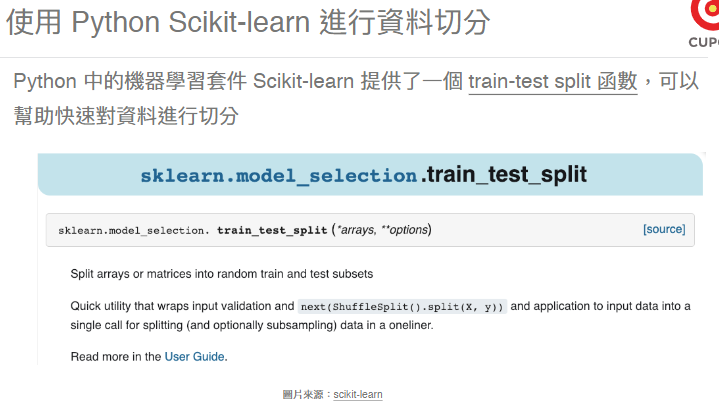

K-fold Cross-validation

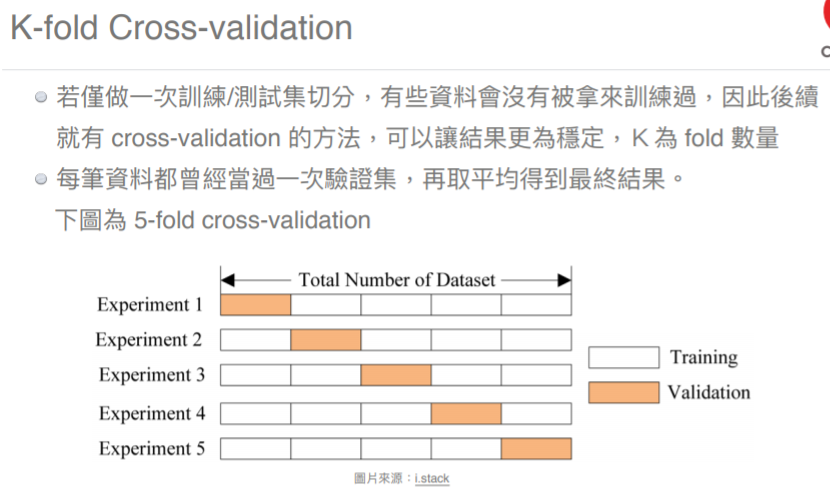

使用 Python Scikit-learn 進行 Cross-validation
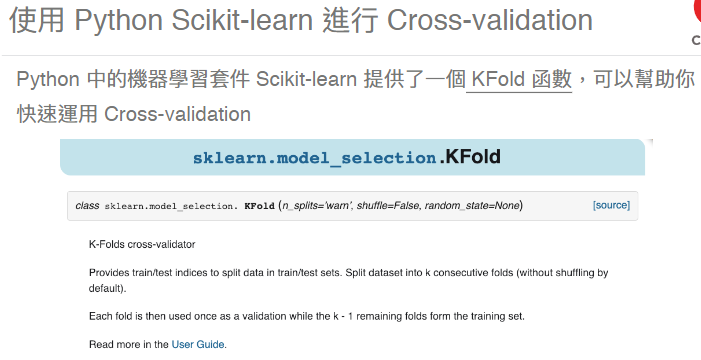

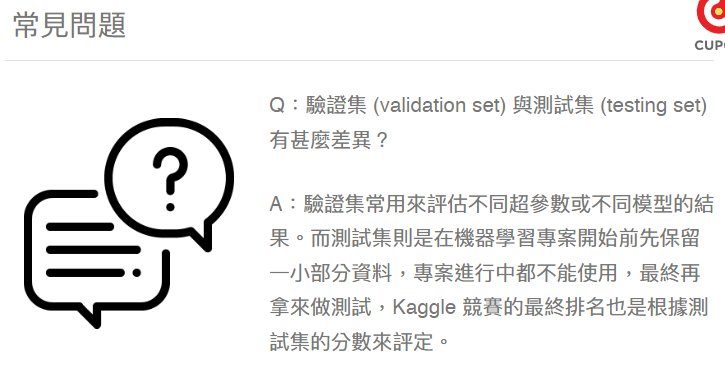

## [延伸閱讀]
[台⼤大電機李宏毅教授講解訊練/驗證/測試集的意義
](https://www.youtube.com/watch?v=D_S6y0Jm6dQ&feature=youtu.be&t=1948)

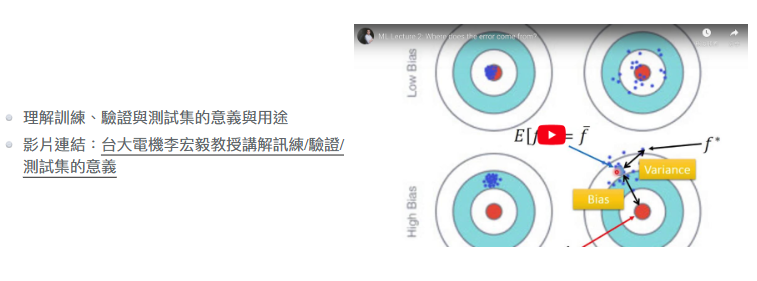

## [教學目標]
學習使用 sklearn 中的 train_test_split 等套件，進行資料的切分

## [範例重點]
了解函數中各個參數的意義

In [1]:
# 引入我們需要的套件
from sklearn.model_selection import train_test_split, KFold
import numpy as np

In [2]:
# 用 numpy 生成隨機資料
X = np.arange(50).reshape(10, 5) # 生成從 0 到 50 的 array，並 reshape 成 (10, 5) 的 matrix
y = np.zeros(10) # 生成一個全零 arrary
y[:5] = 1 # 將一半的值改為 1
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (10, 5)
Shape of y:  (10,)


In [4]:
print('X: shape: ' + str(X.shape))
print(X)
print("")
print('y: shape: ' + str(y.shape))
print(y)

X: shape: (10, 5)
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]
 [30 31 32 33 34]
 [35 36 37 38 39]
 [40 41 42 43 44]
 [45 46 47 48 49]]

y: shape: (10,)
[1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


使用 train_test_split 函數進行切分

請參考 train_test_split 函數的說明，了解函數裡的參數意義

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
https://www.itread01.com/content/1545178350.html

test_size 一定只能小於 1 嗎？

random_state 不設置會怎麼樣呢？


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle = True)

In [21]:
X_train

array([[35, 36, 37, 38, 39],
       [10, 11, 12, 13, 14],
       [45, 46, 47, 48, 49],
       [20, 21, 22, 23, 24],
       [15, 16, 17, 18, 19],
       [30, 31, 32, 33, 34]])

In [22]:
y_train

array([0., 1., 0., 1., 1., 0.])

使用 K-fold Cross-validation 來切分資料

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

_請參考 kf 函數的說明，了解參數中的意義。K 可根據資料大小自行決定，K=5 是蠻常用的大小_

_如果使用 shuffle=True 會怎麼樣?_

In [23]:
#用KFold(n_splits=5)將資料分成5等分 (X, Y都會分)
kf = KFold(n_splits=5)
i = 0
for train_index, test_index in kf.split(X):
    i +=1 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print("FOLD {}: ".format(i))
    print("X_test: ", X_test)
    print("Y_test: ", y_test)
    print("-"*30)

FOLD 1: 
X_test:  [[0 1 2 3 4]
 [5 6 7 8 9]]
Y_test:  [1. 1.]
------------------------------
FOLD 2: 
X_test:  [[10 11 12 13 14]
 [15 16 17 18 19]]
Y_test:  [1. 1.]
------------------------------
FOLD 3: 
X_test:  [[20 21 22 23 24]
 [25 26 27 28 29]]
Y_test:  [1. 0.]
------------------------------
FOLD 4: 
X_test:  [[30 31 32 33 34]
 [35 36 37 38 39]]
Y_test:  [0. 0.]
------------------------------
FOLD 5: 
X_test:  [[40 41 42 43 44]
 [45 46 47 48 49]]
Y_test:  [0. 0.]
------------------------------


## [作業]
作業重點 : 

觀察函數說明，要如何切出固定大小的測試集?

作業 : 

假設我們資料中類別的數量並不均衡，在評估準確率時可能會有所偏頗，試著切分出 y_test 中，0 類別與 1 類別的數量是一樣的 (亦即 y_test 的類別是均衡的)

In [27]:
X = np.arange(1000).reshape(200, 5)
y = np.zeros(200)
y[:40] = 1

可以看見 y 類別中，有 160 個 類別 0，40 個 類別 1 ，請試著使用 train_test_split 函數，切分出 y_test 中能各有 10 筆類別 0 與 10 筆類別 1 。(HINT: 參考函數中的 test_size，可針對不同類別各自作切分後再合併)

# Day035 : regression vs. classification
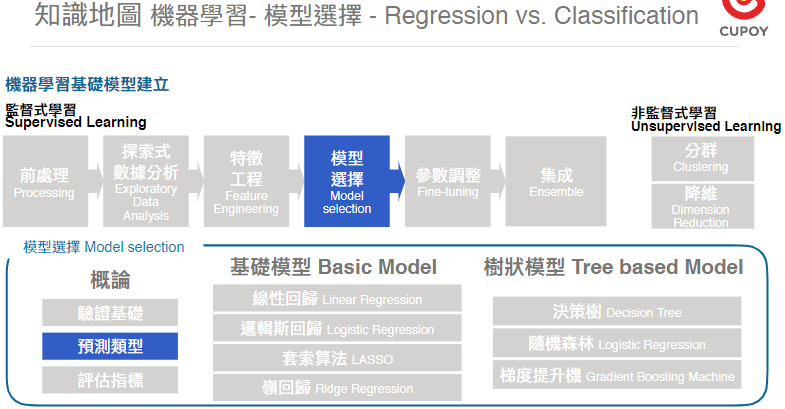

## [知識點目標]
1. 了解機器學習中迴歸與分類的差異
2. 迴歸問題與分類問題的定義
3. 什麼是多分類問題？多標籤問題？

回歸 vs. 分類
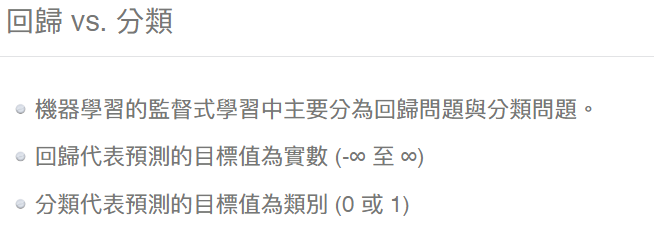

回歸問題可轉換
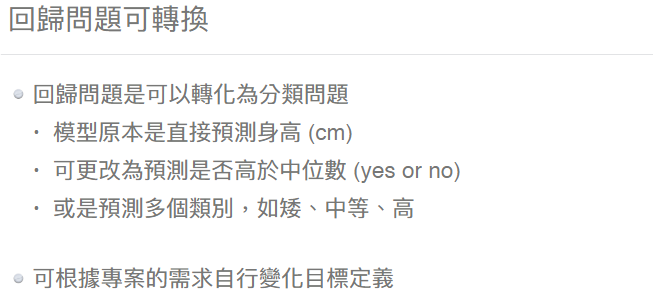

二元分類 (binary-class) vs. 多元分類 (Multi-class)
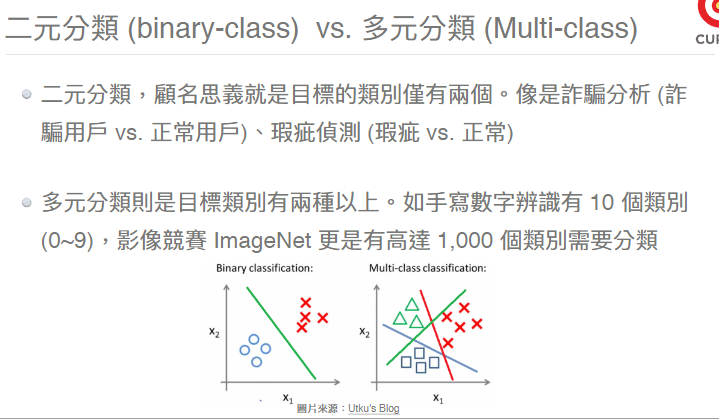

Multi-class vs. Multi-label
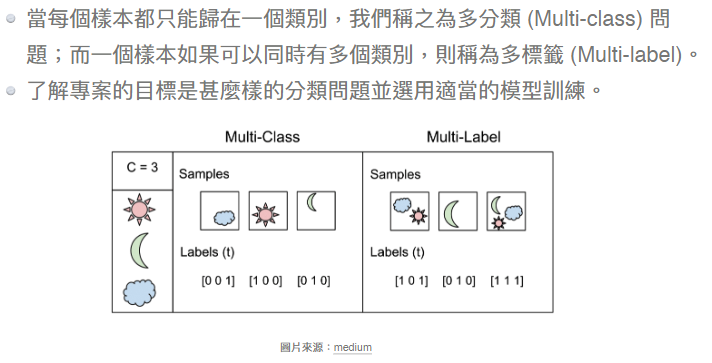

## [延伸閱讀]

[Supervised classification和Regression的比較](http://zylix666.blogspot.com/2016/06/supervised-classificationregression.html)

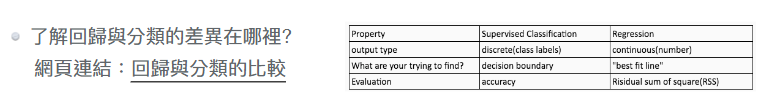

## [作業]


# Day036 : 機器學習
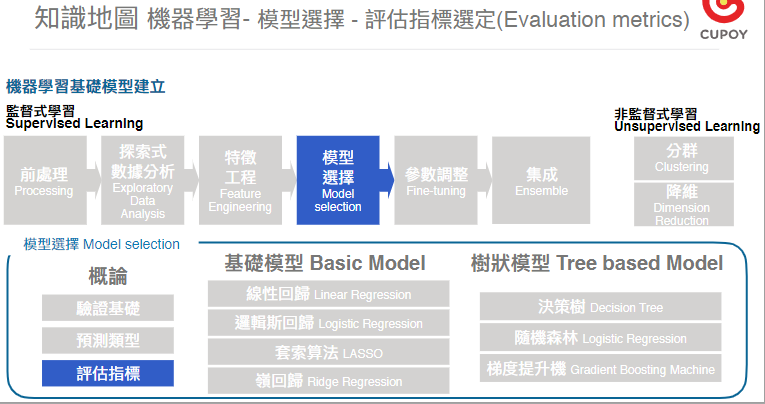

## [知識點目標]
1. 了解機器學習中評估指標的意義及如何選取
2. 迴歸、分類問題應選用的評估指標
3. 不同評估指標的意義及何時該使用

評估指標
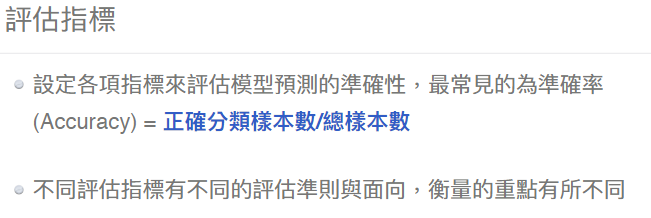

評估指標 - 回歸
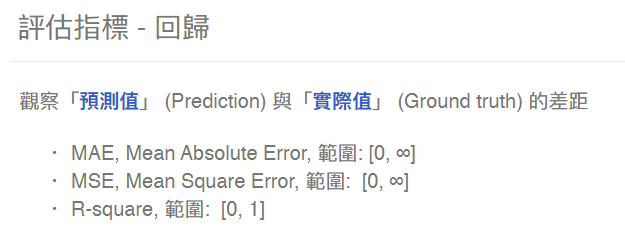

評估指標 - 分類

ROC, AUC, precision, recall, F-score, top-k accuracy(top-5 accuracy)
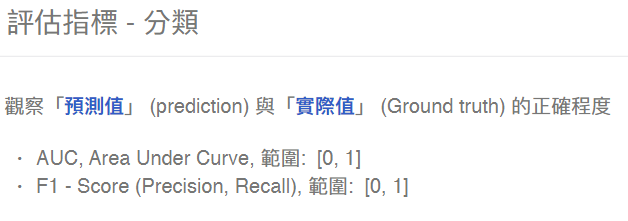

評估指標 - 分類 - AUC, Area Under Curve

https://slideplayer.com/slide/5293728/

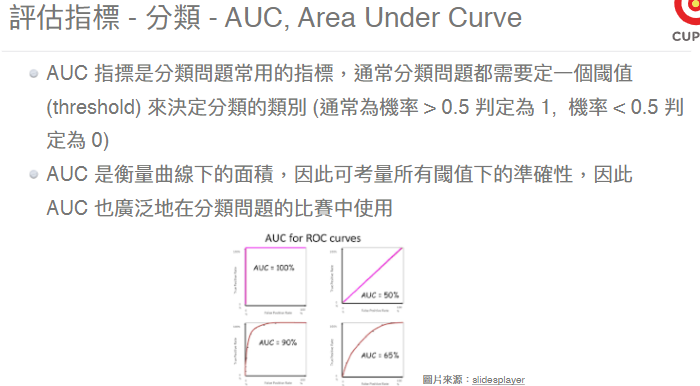

評估指標 - 分類 -  F1-Score
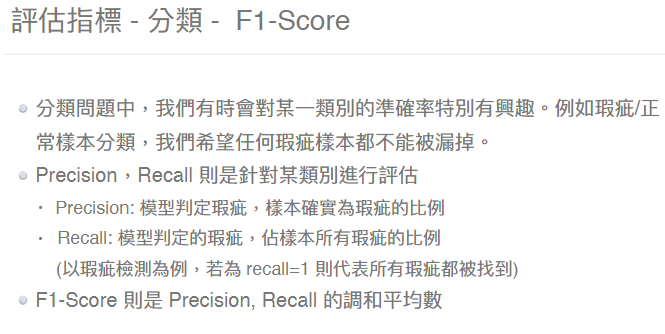

一張圖理理解 Precision, Recall
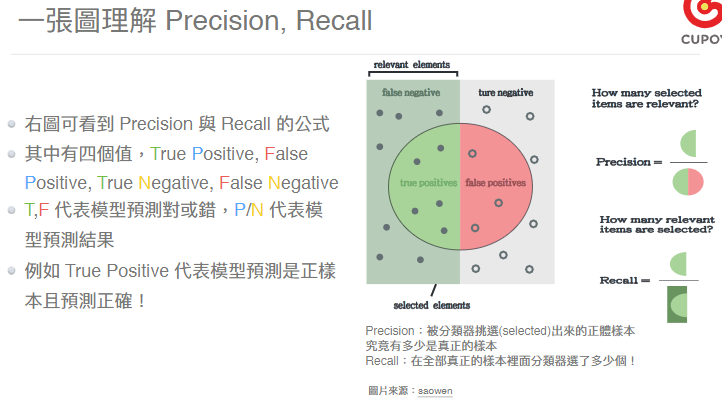

評估指標 - 分類 - 混淆矩陣 (Confusion Matrix)

https://www.mathworks.com/help/deeplearning/ref/plotconfusion.html

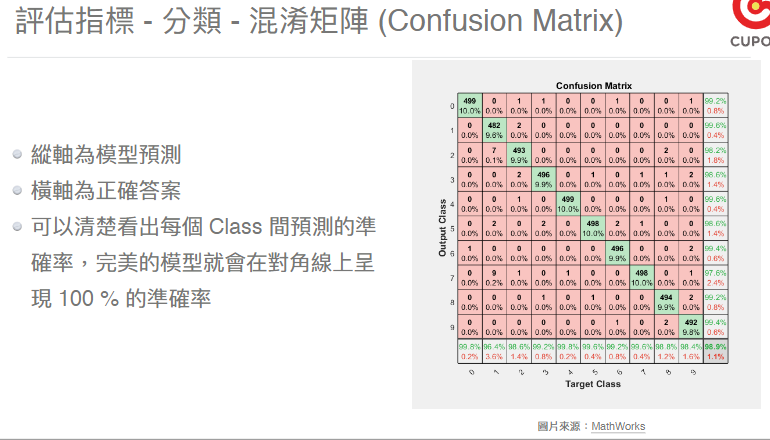

常見問題
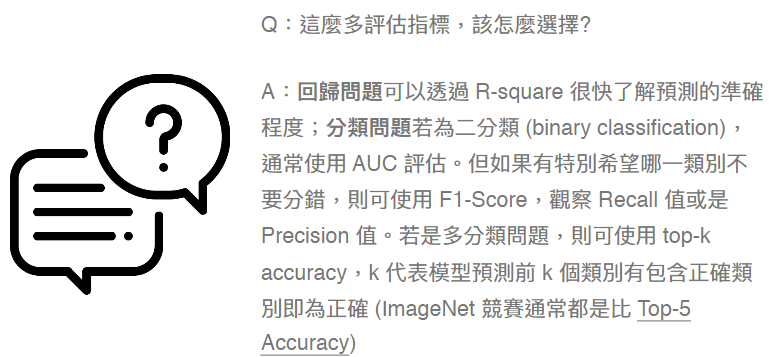

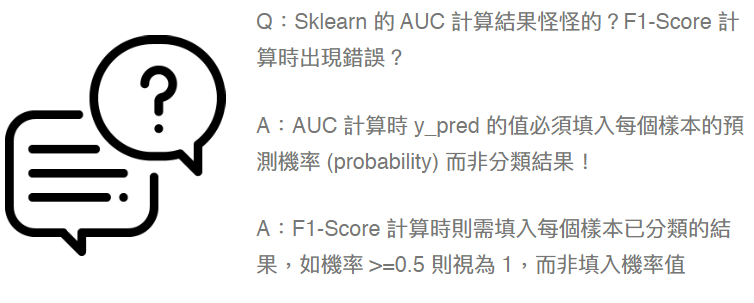

## [延伸閱讀]

1. [深入了了解超常⽤用的指標 AUC](https://www.dataschool.io/roc-curves-and-auc-explained/)

2. [學習更更多評估指標，來衡量機器學習模型的準確度網頁連結：更更多評估指標
](https://zhuanlan.zhihu.com/p/30721429)

## [教學目標]
學習 sklearn 中，各種評估指標的使用與意義

## [範例重點]
注意觀察各指標的數值範圍，以及輸入函數中的資料格式

In [29]:
from sklearn import metrics, datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import numpy as np
%matplotlib inline

### 回歸問題
常見的評估指標有

1. [MAE(Mean Absolute Error, 平均絕對誤差, L1 Loss unction)](https://staruphackers.com/%E4%BB%80%E9%BA%BC%E6%98%AF%E5%B9%B3%E5%9D%87%E7%B5%95%E5%B0%8D%E8%AA%A4%E5%B7%AE-mean-absolute-error-mae%EF%BC%9F/)
2. [MSE(Mean-Square Error, 均方誤差, L2 Loss Function)](https://staruphackers.com/%E4%BB%80%E9%BA%BC%E6%98%AF%E5%9D%87%E6%96%B9%E8%AA%A4%E5%B7%AE-mean-square-error-mse%EF%BC%9F/)
3. R-square

我們隨機生成(X, y)資料，然後使用線性回歸模型做預測，再使用 MAE, MSE, R-square 評估

In [32]:
X, y = datasets.make_regression(n_features=1, random_state=42, noise=4) # 生成資料
model = LinearRegression() # 建立回歸模型
model.fit(X, y) # 將資料放進模型訓練
prediction = model.predict(X) # 進行預測
mae = metrics.mean_absolute_error(prediction, y) # 使用 MAE 評估
mse = metrics.mean_squared_error(prediction, y) # 使用 MSE 評估
r2 = metrics.r2_score(prediction, y) # 使用 r-square 評估
print("MAE: ", mae)
print("MSE: ", mse)
print("R-square: ", r2)

MAE:  2.841797252565566
MSE:  12.48868006739824
R-square:  0.9916581036260311


### 分類問題

常見的評估指標有

1. AUC
2. F1-Score (Precision, Recall)

In [48]:
cancer = datasets.load_breast_cancer() # 我們使用 sklearn 內含的乳癌資料集
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=50, random_state=0)

In [49]:
print(y_test) # 測試集中的 label

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0]


In [35]:
y_pred = np.random.random((50,)) # 我們先隨機生成 50 筆預測值，範圍都在 0~1 之間，代表機率值

In [36]:
print(y_pred)

[0.12129947 0.71125076 0.47673358 0.67399291 0.2091649  0.19715214
 0.64911308 0.0583071  0.56323301 0.53318029 0.84810996 0.37225201
 0.7012247  0.90616618 0.3809889  0.39976783 0.45501615 0.95312891
 0.55133194 0.15839461 0.21792491 0.38021106 0.70464615 0.18845734
 0.84698001 0.85916915 0.39583233 0.35997115 0.25117425 0.54559236
 0.31820252 0.33703965 0.49344225 0.67071557 0.18694868 0.47413814
 0.99590472 0.58503098 0.21308242 0.26781915 0.12203587 0.90225167
 0.96080567 0.65909156 0.02046907 0.92622149 0.75017246 0.14439026
 0.58925153 0.51600085]


### AUC

In [50]:
auc = metrics.roc_auc_score(y_test, y_pred) # 使用 roc_auc_score 來評估。 **這邊特別注意 y_pred 必須要放機率值進去!**
print("AUC: ", auc) # 得到結果約 0.5，與亂猜的結果相近，因為我們的預測值是用隨機生成的

AUC:  0.5127334465195247


### F1-Score

In [51]:
threshold = 0.5 
y_pred_binarized = np.where(y_pred>threshold, 1, 0) # 使用 np.where 函數, 將 y_pred > 0.5 的值變為 1，小於 0.5 的為 0
f1 = metrics.f1_score(y_test, y_pred_binarized) # 使用 F1-Score 評估
precision = metrics.precision_score(y_test, y_pred_binarized) # 使用 Precision 評估
recall  = metrics.recall_score(y_test, y_pred_binarized) # 使用 recall 評估
print("F1-Score: ", f1) 
print("Precision: ", precision)
print("Recall: ", recall)

F1-Score:  0.5454545454545454
Precision:  0.625
Recall:  0.4838709677419355


## [作業重點]
了解 F1-score 的公式意義，並試著理解程式碼

請參考 F1-score 的公式與原始碼，試著寫出 F2-Score 的計算函數

F1-Score 其實是 F-Score 中的 β 值為 1 的特例，代表 Precision 與 Recall 的權重相同

_請參考 F1-score 的公式 與下圖的 F2-score 公式圖，試著寫出 F2-Score 的計算函數_

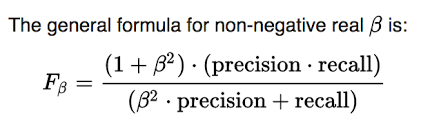

_HINT: 可使用 slearn.metrics 中的 precision, recall 函數幫忙_

In [53]:
import numpy as np
y_pred = np.random.randint(2, size=100)  # 生成 100 個隨機的 0 / 1 prediction
y_true = np.random.randint(2, size=100)  # 生成 100 個隨機的 0 / 1 ground truth

In [54]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1])